# Demo: Denoising of 2D simulated images

This notebook demonstrates applying a SN2N model for a 2D denoising task, assuming that training was already completed via 1_training.ipynb.

## Apply trained SN2N network to raw image

When predicting, we need to first confirm and set important parameters related to prediction.

-----Parameters------  
<font color="red">=====Important==========</font>  
- <span style="color:blue">img_path:</span>  
    Path of raw images to train.  
- <span style="color:blue">model_path:</span>        
    Path of model for inference
- <span style="color:blue">infer_mode:</span>        
    Prediction Mode    
    0: Predict the results of all models generated during training 
    under the default "models" directory on the img_path.                
    1: Predict the results of the models provided by the user under 
    the given model_path on the Img_path provided by the user.
    
-------------------------------

### Step 1: Define custom parameters.

In [6]:
import os
import sys
sys.path.append(os.path.abspath(r'E:\PreStudy\02Source\SN2N'))
from SN2N.inference import Predictor2D
from SN2N.get_options import Predict2D

    
img_path = 'data/raw_data'
model_path = 'data/models'
infer_mode = '0'

Predict2D_args = [
    '--img_path', img_path,
    '--model_path', model_path,
    '--infer_mode', infer_mode
]
args = Predict2D(Predict2D_args)
print("Arguments received:", args)

Arguments received: Namespace(img_path='data/raw_data', infer_mode=0, model_path='data/models')


### Step 2: Execute prediction.

The raw data used for generating training data is stored in the <font color="red">'Path:/raw_data'</font> directory.  
the models are by default stored in the <font color="red">'Path:/models'</font> directory.  
We predict the results of all modes for all original raw image files and save them in the <font color="red">'Path:/predictions'</font> directory.

During prediction, we utilized all models under the "models" directory to predict on all original noisy images under the "raw_image" directory. The prediction results are stored in the format of <font color="red">raw_image_name+model_name</font>. Users can choose the corresponding results for specific images and epochs as needed.

In [7]:
p = Predictor2D(img_path = args.img_path, model_path = args.model_path, infer_mode = infer_mode)
p.execute()
print("Predicting completed.")

The path for the raw images used for training is located under:
data/raw_data
Models is being saved under:
data/models
Predictions is being saved under:
data\predictions
=====Model: 1=====


E:\PreStudy\02Source\SN2N\SN2N\inference.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(m_path, map_location=device)


Frame: 1
Frame: 2
Frame: 3
=====Model: 2=====
Frame: 1
Frame: 2
Frame: 3
Predicting completed.


## Demonstrate prediction results and evaluation

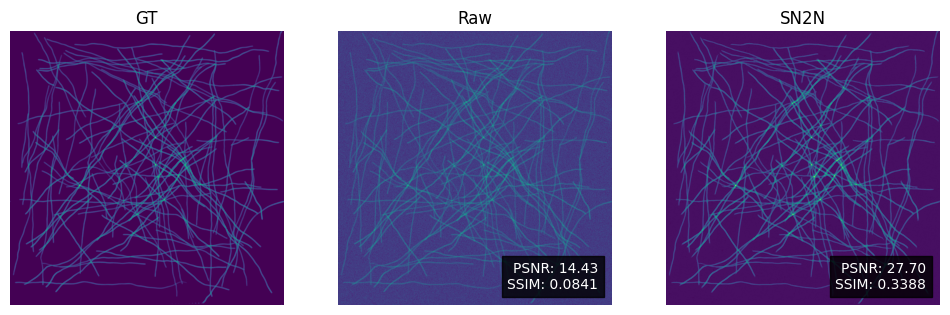

In [13]:
import tifffile
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

def add_psnr_ssim_labels(ax, psnr, ssim):
    text = f"PSNR: {psnr:.2f}\nSSIM: {ssim:.4f}"
    ax.text(0.95, 0.05, text, color='white', transform=ax.transAxes,
            fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='black', alpha=0.8))

raw = tifffile.imread('data/raw_data/levelTWO_1.tif')
GT = tifffile.imread('data/gt/1.tif')
SN2N = tifffile.imread('data/predictions/levelTWO_1.tif_model_9_16_0.pth.tif')
SN2N = SN2N.squeeze()  # 排除为1的维度

raw_psnr_value = compare_psnr(GT, raw)
raw_ssim_value, _ = compare_ssim(GT, raw, full=True)

sn2n_psnr_value = compare_psnr(GT, SN2N)
sn2n_ssim_value, _ = compare_ssim(GT, SN2N, full=True)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(GT, cmap='viridis')
axs[0].set_title('GT')
axs[0].axis('off')

axs[1].imshow(raw, cmap='viridis')
axs[1].set_title('Raw')
axs[1].axis('off')
add_psnr_ssim_labels(axs[1], raw_psnr_value, raw_ssim_value)

axs[2].imshow(SN2N, cmap='viridis')
axs[2].set_title('SN2N')
axs[2].axis('off')
add_psnr_ssim_labels(axs[2], sn2n_psnr_value, sn2n_ssim_value)

plt.show()